# 1. Popularity Based Recommendation System

## About the Dataset (jokes.csv)



 
1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").
  
2. One row per user
3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.



### Q1. Read the data (jokes.csv)

In [1]:
import os
import numpy as np  
import pandas as pd

In [2]:
jokes_df = pd.read_csv("jokes.csv")  
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [3]:
jokes_df.shape

(24983, 101)

### Q2. Create new Dataframe `ratings` starting from column `joke1` and consider first 200 rows only



In [4]:
ratings_df = jokes_df.iloc[0:200,1:]
ratings_df.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [5]:
ratings_df.shape

(200, 100)

### Q3. Preprocess `ratings`


*   Verify presence of null values
*   Replace null with 0



In [6]:
ratings_df.isnull().sum

<bound method DataFrame.sum of      Joke1  Joke2  Joke3  Joke4  Joke5  Joke6  Joke7  Joke8  Joke9  Joke10  \
0    False  False  False  False  False  False  False  False  False   False   
1    False  False  False  False  False  False  False  False  False   False   
2    False  False  False  False  False  False  False  False  False   False   
3    False  False  False  False  False  False  False  False  False   False   
4    False  False  False  False  False  False  False  False  False   False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
195  False  False  False  False  False  False  False  False  False   False   
196  False  False  False  False  False  False  False  False  False   False   
197  False  False  False  False  False  False  False  False  False   False   
198  False  False  False  False  False  False  False  False  False   False   
199  False  False  False  False  False  False  False  False  False   False   

     ...  Joke91  Joke92  Joke93

In [7]:
ratings_df.replace(to_replace=99,value=0,inplace=True)

In [8]:
ratings_df.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Q4. Find mean for each joke


*   Find mean of 100 jokes



In [9]:
ratings_mean=ratings_df.mean()

In [10]:
ratings_mean.head()

Joke1    0.53005
Joke2    0.59390
Joke3    0.23765
Joke4   -0.70100
Joke5   -0.03790
dtype: float64

### Q5. List most popular 10 jokes

In [11]:
ratings_mean.sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64

In [12]:
pd.DataFrame(ratings_mean).nlargest(10,0)

,0
Joke50,4.05540
Joke36,3.61150
Joke53,3.57150
Joke35,3.22315
Joke29,3.18995
Joke27,3.05240
Joke62,2.86185
Joke49,2.85000
Joke32,2.77955
Joke31,2.65710


# 2. Collaborative Filtering based Recommendation System

## About the Dataset

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

#### Execute below cells to read the datasets

In [13]:
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\SivaPC\Anaconda3\lib\site-packages\IPython\core\interactiveshell.

# Q1. Explore the Dataset

1.   Check shape of all the datasets
2.   Print Columns in all the datasets
3.   Remove last 3 columns of `books` ('imageUrlS', 'imageUrlM', 'imageUrlL')and verify



In [14]:
books.shape

(271360, 8)

In [15]:
users.shape

(278858, 3)

In [16]:
ratings.shape

(1149780, 3)

In [17]:
print(books.columns)
print(users.columns)
print(ratings.columns)

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')
Index(['userID', 'Location', 'Age'], dtype='object')
Index(['userID', 'ISBN', 'bookRating'], dtype='object')


In [18]:
books=books.iloc[:,:-3]

In [19]:
books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


# Q2. Data Preprocessing

### Create new DataFrame `ratings_new` with:
1.   Books from `ratings` Dataset, which exists in `books` Dataset (Intersect on ISBN)
2.   Ratings from `ratings` Dataset, which exists in `users` Dataset (Intersect on userID)


In [20]:
ratings_new1=ratings.merge(books,how='inner',on=['ISBN']).merge(users,how='inner',on=['userID'])

In [21]:
ratings_new1.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0


In [22]:
ratings_new1.shape

(1031136, 9)

#### Alternate method to merge the tables

In [23]:
ratings_new=ratings[ratings.ISBN.isin(books.ISBN)]

In [24]:
ratings_new=ratings_new[ratings.userID.isin(users.userID)]

C:\Users\SivaPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [25]:
ratings_new.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [26]:
ratings_new.shape

(1031136, 3)

# Q3. Data Preprocessing

### In new Dataframe, drop rows with 0 `bookRating`, since 0 is mentioned as 'Implicit Rating'.
#### (Check shape of new Dataframe before and after dropping 0s)


In [27]:
## shape before dropping rows
ratings_new.shape

(1031136, 3)

In [28]:
ratings_new=ratings_new[ratings_new['bookRating'] != 0]

In [29]:
## Shape after dropping rows
ratings_new.shape

(383842, 3)

# Q4. Check rating's distribution
### Plot a visual to identify highest occuring rating 

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

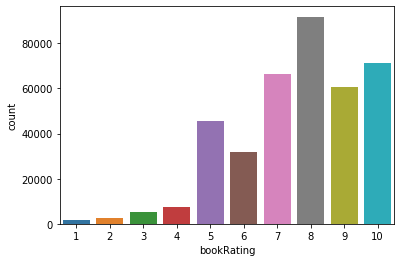

In [31]:
sns.countplot(ratings_new.bookRating)

In [32]:
ratings_new['bookRating'].value_counts()

8     91804
10    71225
7     66402
9     60778
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: bookRating, dtype: int64

# Q5. Build a User-Based Collaborative Filtering model



1.   Consider users who have rated atleast 100 books
2.   Transform data to surprise format
3.   Assure that only user, book and rating columns are present in the new dataset in surprise format



In [33]:
ratings_sel=ratings_new.groupby("bookRating")["userID"].agg("count").nlargest(100)

In [81]:
ratings_sel

bookRating
8     91804
10    71225
7     66402
9     60778
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: userID, dtype: int64

In [82]:
ratings_new.groupby("bookRating")["userID"].count()

bookRating
1      1481
2      2375
3      5118
4      7617
5     45355
6     31687
7     66402
8     91804
9     60778
10    71225
Name: userID, dtype: int64

In [85]:
ratings_user_count=ratings_new.groupby("userID").count()>=100
userIDs=ratings_user_count[ratings_user_count["ISBN"]].index
ratings_new=ratings_new[ratings_new["userID"].isin(userIDs)]

In [86]:
ratings_new.shape

(103271, 3)

In [87]:
#2 Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor


reader = Reader(rating_scale=(1, 10))

In [88]:
data=Dataset.load_from_df(ratings_new[['userID','ISBN','bookRating']],reader)

In [89]:
data.df.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9


In [90]:
type(data)

surprise.dataset.DatasetAutoFolds

In [91]:
data.df.shape

(103271, 3)

# Q6. Apply SVD for user based filtering


1.   Split the data into train and test
2.   Train model on SVD
3.   Test Accuracy of the model




In [92]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.25,random_state=45)

In [93]:
type(trainset)

surprise.trainset.Trainset

In [94]:
from surprise import SVD
from surprise import accuracy

In [95]:
svd_model = SVD()
svd_model.fit(trainset)

In [96]:
test_pred = svd_model.test(testset)

In [97]:
accuracy.rmse(test_pred)

RMSE: 1.4820


1.4820295576530154

# Q7. Create a function to generate `n` recommendations for user `x`. (n, x should be parameterized)

In [127]:
test_pred_df=pd.DataFrame(test_pred)

In [145]:
## function to generate n recommendations for user x
def show_recommendations(userID,num):
      user_rec = test_pred_df[test_pred_df['uid']==userID][['uid','iid','r_ui','est']].sort_values(by='est',ascending=False).head(num)
      return user_rec


In [147]:
show_recommendations(138578,5)

,uid,iid,r_ui,est
16294,138578,0316693006,9.0,9.014190
13263,138578,0786863404,9.0,8.651150
145,138578,1555834779,10.0,8.604316
6161,138578,0804108005,7.0,8.604316
7399,138578,0312983093,8.0,8.604316
